In [61]:
import matplotlib.pyplot as plt
import importlib
import MDP
importlib.reload(MDP)
from MDP import HomoMDP
import numpy as np

In [62]:
np.random.seed(42)

### Parking Problem

In [63]:
N = 10
p = 0.8
responses = {}

nonterminal_states = []

for i in range(1, N+1):
   nonterminal_states.extend([("free", i), ("parked", i)])

actions = ["move", "park"]
for state in nonterminal_states:
  if state == "terminal": continue

  avail, time = state
  if time < N:
    responses[(avail, time), "move"] = [(("free", time+1), p, 0), 
                                          (("parked", time+1), 1-p, 0)]
    if avail == 'free':   
      responses[(avail, time), "park"] = [("terminal", 1, time)]
  else:
    if avail == 'free':
      responses[(avail, time), "park"] = [("terminal", 1, time)]
    else:
      responses[(avail, time), "move"] = [("terminal", 1, 0)]

parkingMDP = HomoMDP(name="Parking",
                     initial_distribution={("free", 1) : p, ("parked", 1): 1-p},
                     responses=responses)

Calculate the value of the policy "park as soon as possible"

In [27]:
park_policy = {state: "park" if state[0] == "free" else "move" for state in nonterminal_states}
values = parkingMDP.policy_evaluation(park_policy, 
                                      method="temporal_difference", 
                                      max_iter=100000)
values

TD(0) reached maximal iterations.


{'terminal': 0,
 ('parked', 5): 3.2622353036684797,
 ('parked', 2): 3.315562465758069,
 ('parked', 8): 0,
 ('free', 5): 4.9999970080709675,
 ('free', 2): 1.9999999999999991,
 ('free', 8): 0.8,
 ('parked', 1): 2.2939888239879407,
 ('free', 1): 0.9999999999999996,
 ('parked', 4): 4.583522541800035,
 ('parked', 10): 0,
 ('free', 4): 3.9999999999999982,
 ('parked', 7): 0.0,
 ('free', 10): 0,
 ('free', 7): 4.559250919300001,
 ('parked', 3): 4.031214468906771,
 ('free', 3): 2.9999999999999982,
 ('parked', 6): 1.8442942258300001,
 ('free', 6): 5.343486065210926,
 ('parked', 9): 0,
 ('free', 9): 0}

Because the MDP is a long chain, it can be seen that the trajectories have not reached time 9 and time 10, since the values here are still 0.

Now we calculate best policy using Q-Learning and compare with policy iteration.

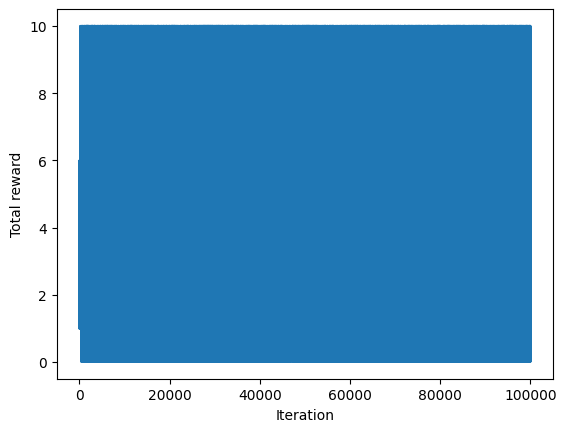

{('parked', 5): 'move',
 ('parked', 2): 'move',
 ('parked', 8): 'move',
 ('free', 5): 'move',
 ('free', 2): 'move',
 ('free', 8): 'move',
 ('parked', 1): 'move',
 ('free', 1): 'move',
 ('parked', 4): 'move',
 ('parked', 10): 'move',
 ('free', 4): 'move',
 ('parked', 7): 'move',
 ('free', 10): 'park',
 ('free', 7): 'move',
 ('parked', 3): 'move',
 ('free', 3): 'move',
 ('parked', 6): 'move',
 ('free', 6): 'move',
 ('parked', 9): 'move',
 ('free', 9): 'park'}

In [ ]:
best_policy = parkingMDP.best_policy(method="q_learning", 
                                     step_size=0.8, 
                                     explore=0.05,
                                     log=False, 
                                     plot=True,
                                     max_iter=100000)
best_policy

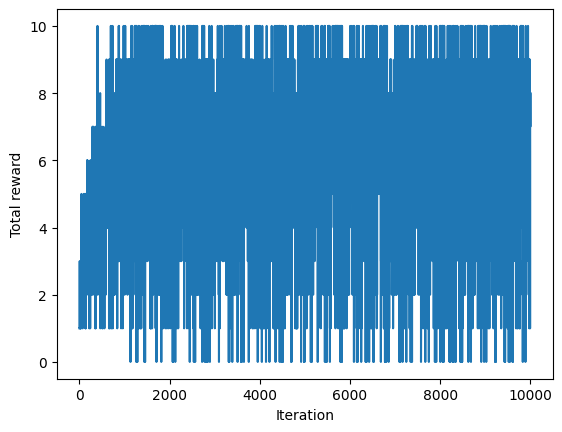

{('parked', 5): 'move',
 ('parked', 2): 'move',
 ('parked', 8): 'move',
 ('free', 5): 'move',
 ('free', 2): 'move',
 ('free', 8): 'park',
 ('parked', 1): 'move',
 ('free', 1): 'move',
 ('parked', 4): 'move',
 ('parked', 10): 'move',
 ('free', 4): 'move',
 ('parked', 7): 'move',
 ('free', 10): 'park',
 ('free', 7): 'move',
 ('parked', 3): 'move',
 ('free', 3): 'move',
 ('parked', 6): 'move',
 ('free', 6): 'move',
 ('parked', 9): 'move',
 ('free', 9): 'park'}

In [65]:
best_policy = parkingMDP.best_policy(method="q_learning", 
                                     step_size=0.8, 
                                     explore=0.05,
                                     log=False, 
                                     plot=True,
                                     max_iter=10000)
best_policy

The reward fluctuates so much that it cannot be seen clearly. However, we can see that the reward can reach 10.

In [25]:
iterated_policy = parkingMDP.best_policy(method="policy_iteration")
iterated_policy

Policy evaluation: converged after 4 iterations
Policy evaluation: converged after 4 iterations
Best policy: converged after 1 iterations


{('parked', 5): 'move',
 ('parked', 2): 'move',
 ('parked', 8): 'move',
 ('free', 5): 'move',
 ('free', 2): 'move',
 ('free', 8): 'move',
 ('parked', 1): 'move',
 ('free', 1): 'move',
 ('parked', 4): 'move',
 ('parked', 10): 'move',
 ('free', 4): 'move',
 ('parked', 7): 'move',
 ('free', 10): 'park',
 ('free', 7): 'move',
 ('parked', 3): 'move',
 ('free', 3): 'move',
 ('parked', 6): 'move',
 ('free', 6): 'move',
 ('parked', 9): 'move',
 ('free', 9): 'park'}

The policy coincides with that in policy iteration method. Sometimes, in Q-learning, the agent decides to park in (free, 8) and (free, 9), while in policy iteration, it decides to park in (free, 9) only.

However, when explore is set to 0, the result is bad. This can be interpreted as that if the agent has decided to park and receives the reward. Then the value at action park is much higher than that at move and the agent will never decides to move again.

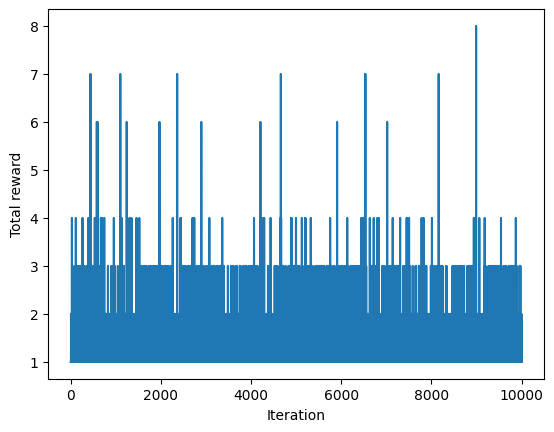

{('parked', 5): 'move',
 ('parked', 2): 'move',
 ('parked', 8): 'move',
 ('free', 5): 'move',
 ('free', 2): 'park',
 ('free', 8): 'park',
 ('parked', 1): 'move',
 ('free', 1): 'park',
 ('parked', 4): 'move',
 ('parked', 10): 'move',
 ('free', 4): 'park',
 ('parked', 7): 'move',
 ('free', 10): 'park',
 ('free', 7): 'park',
 ('parked', 3): 'move',
 ('free', 3): 'park',
 ('parked', 6): 'move',
 ('free', 6): 'park',
 ('parked', 9): 'move',
 ('free', 9): 'park'}

In [67]:
best_policy = parkingMDP.best_policy(method="q_learning", 
                                     step_size=0.8, 
                                     explore=0.0,
                                     log=False, 
                                     plot=True,
                                     max_iter=10000)
best_policy

In the result above, the agent decides to park at (free, 1), which is not good.

### The Gambler's Problem

In [54]:
nonterminal_states = list(range(1, 100))
actions = list(range(1, 100))

responses = {}
for state in nonterminal_states:
  for action in range(1, np.min([state, 100-state])+1):
    win = (state+action, p, 1) if state+action == 100 else (state+action, p, 0)
    lose = (state-action, (1-p), 0)
    responses[state, action] = [win, lose]

# Choose the initial state uniformly on the capital rather than 0 and 100.  
uniform_prob = 1/len(nonterminal_states)
gamblerMDP = HomoMDP(name="Gambler",
                    initial_distribution={state: uniform_prob 
                                          for state in nonterminal_states},
                    responses=responses)

Now we try evaluating the policy "bet all possible"

In [43]:
bet_all_possible = {state : np.min([state, 100-state]) for state in nonterminal_states}

values = gamblerMDP.policy_evaluation(bet_all_possible, 
                                      method="temporal_difference", 
                                      max_iter=10000)
values

TD(0) reached maximal iterations.


{0: 0,
 100: 0,
 1: 0.23046880133940043,
 2: 0.3750181094556707,
 3: 0.32314166910687014,
 4: 0.4498965633052615,
 5: 0.2829596857453217,
 6: 0.36969499824557767,
 7: 0.5402516433282185,
 8: 0.49385173510108554,
 9: 0.3915463752000257,
 10: 0.5168346944199084,
 11: 0.5156974863329804,
 12: 0.38291000852763535,
 13: 0.4500977004765058,
 14: 0.5412459970554578,
 15: 0.4828251403385554,
 16: 0.5186283771989649,
 17: 0.5732300428123336,
 18: 0.5394655161623656,
 19: 0.7630544832782011,
 20: 0.6843376155281555,
 21: 0.6274108445591211,
 22: 0.5554848249148203,
 23: 0.6139022504661419,
 24: 0.5502215556451973,
 25: 0.5098912959956439,
 26: 0.6384203300132202,
 27: 0.783709709892232,
 28: 0.7138501484561866,
 29: 0.45965293808509927,
 30: 0.6761212938672648,
 31: 0.768662615087818,
 32: 0.7755563249678645,
 33: 0.5121071979848878,
 34: 0.6595290656666822,
 35: 0.6498421366579388,
 36: 0.6842877289429086,
 37: 0.7227553056462026,
 38: 0.8013900176930908,
 39: 0.5742246277900406,
 40: 0.8726480

Calculate the best policy using Q-Learning

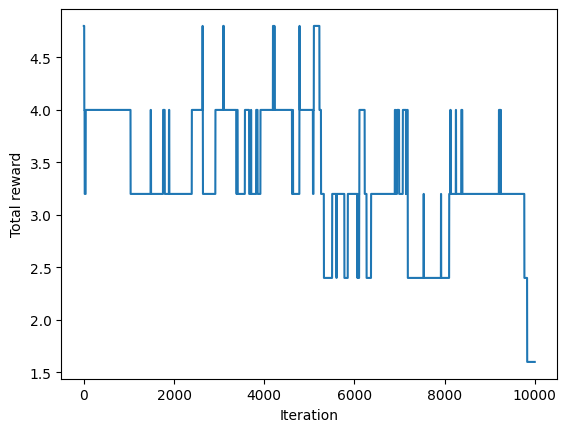

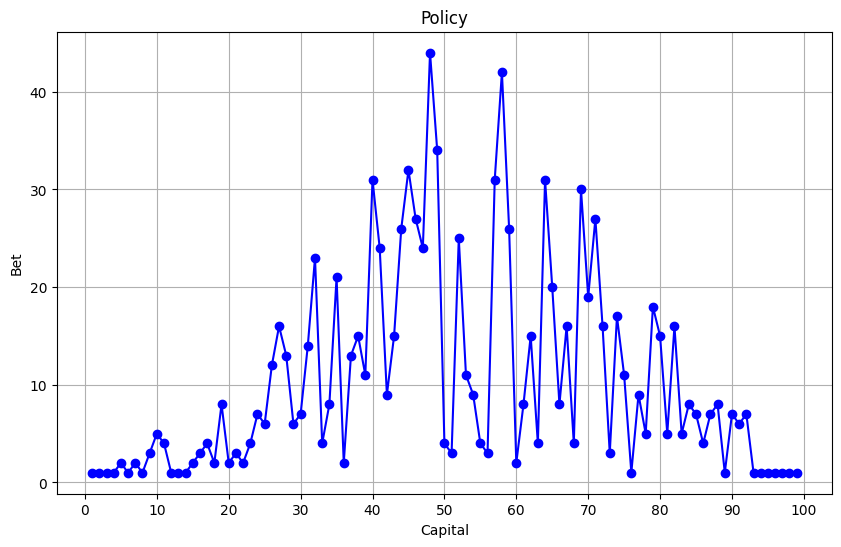

In [55]:
q_policy = gamblerMDP.best_policy(method="q_learning", 
                                     step_size=0.8, 
                                     explore=0.05,
                                     log=False, 
                                     plot=True,
                                     max_iter=10000)
# Prepare data for plotting
x = list(q_policy.keys())
y = list(q_policy.values())

# Filter out None values for plotting
x_filtered = [x[i] for i in range(len(y)) if y[i] is not None]
y_filtered = [y[i] for i in range(len(y)) if y[i] is not None]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_filtered, y_filtered, marker='o', linestyle='-', color='b')
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Bet')
plt.xticks(range(0, 101, 10))  # Set x-ticks at intervals of 10
plt.grid()
plt.show()

The policy looks similar to the iterated policy in practical work 2. 